In [1]:
import pandas as pd
df = pd.read_csv("/content/Laptop_Train_v2.csv")


In [2]:
print(df.shape)
df.head(5)

(2358, 6)


,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


In [3]:
map_polarity = {'neutral': 2, 'positive': 1, "negative": 0} # map data

df["polarity"] = df["polarity"].map(map_polarity)

In [4]:
df=df.drop('from',axis=1)

In [5]:
df=df.drop('to',axis=1)

In [6]:
df.isnull().sum()

id              0
Sentence        0
Aspect Term     0
polarity       45
dtype: int64

In [7]:
df=df.dropna()

In [10]:
df.Sentence[0]

'I charge it at night and skip taking the cord with me because of the good battery life.'

In [15]:
!python -m spacy download en_core_web_lg


/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-27 16:36:15.138118: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 16:36:15.138324: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-27 16:36:15.138352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [16]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [18]:

df['vector'] = df['Sentence'].apply(lambda Sentence: nlp(Sentence).vector)  


In [30]:
df.Sentence[0]

'I charge it at night and skip taking the cord with me because of the good battery life.'

In [31]:
doc=nlp('I charge it at night and skip taking the cord with me because of the good battery life')

In [32]:
doc.vector

array([-1.2729745 ,  0.00978446, -2.652406  , -0.28517944,  3.3889456 ,
        0.02098886,  0.6579106 ,  5.198671  , -0.86530125,  1.0526719 ,
        6.804141  ,  2.5962276 , -4.7768674 ,  1.2417628 ,  0.89263344,
        0.77196056,  2.2373228 , -2.0045938 , -1.2553711 , -2.233595  ,
        2.0405955 ,  0.08339837,  0.79714   , -1.4279128 ,  0.6639573 ,
       -2.2964773 , -4.534254  , -0.8458472 , -1.2175916 ,  3.0580854 ,
        1.2740682 , -1.2379045 ,  0.12223387, -2.2867572 , -1.9684792 ,
       -0.6553356 , -0.66817975,  2.551     ,  2.181854  ,  2.0704887 ,
       -0.3177761 ,  1.4217114 ,  0.92252785, -0.6773231 , -0.5234578 ,
        1.3756607 , -0.57904243, -2.1216908 , -1.069951  ,  1.9732206 ,
       -0.224254  ,  2.298604  , -0.6261572 , -3.6963015 , -1.5208166 ,
        0.75370777,  0.9921721 ,  1.1213659 ,  0.13459447,  0.5445867 ,
        0.88889897, -1.8935895 , -0.9161162 , -2.546435  ,  0.3181628 ,
       -0.3380923 , -3.6981363 , -3.047476  ,  0.94029206,  3.17

In [33]:
doc.vector.shape

(300,)

In [19]:
df.head()

,id,Sentence,Aspect Term,polarity,vector
0,2339,I charge it at night and skip taking the cord ...,cord,2.0,"[-1.2099998, -0.23755157, -2.7256005, -0.45087..."
1,2339,I charge it at night and skip taking the cord ...,battery life,1.0,"[-1.2099998, -0.23755157, -2.7256005, -0.45087..."
2,1316,The tech guy then said the service center does...,service center,0.0,"[-0.9789245, 1.8289741, -1.5701778, -0.0493232..."
3,1316,The tech guy then said the service center does...,"""sales"" team",0.0,"[-0.9789245, 1.8289741, -1.5701778, -0.0493232..."
4,1316,The tech guy then said the service center does...,tech guy,2.0,"[-0.9789245, 1.8289741, -1.5701778, -0.0493232..."


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.polarity,
    test_size=0.2,
    random_state=20
)

In [34]:
X_train

array([array([-1.04661417e+00,  1.67556918e+00, -2.38447857e+00,  8.10787261e-01,
               2.18399858e+00, -5.31749487e-01,  1.17984605e+00,  4.86317539e+00,
              -2.02849507e+00, -5.26578307e-01,  6.59355307e+00,  1.63057029e+00,
              -4.19599104e+00,  1.32987034e+00,  2.17067027e+00,  6.64957523e-01,
               2.08997440e+00, -1.56921232e+00, -6.93052053e-01, -1.81198692e+00,
               2.15223956e+00,  4.30370450e-01,  7.66386747e-01, -2.94081473e+00,
              -1.84389126e+00, -2.20499706e+00, -3.45569086e+00, -2.72816396e+00,
              -2.70729572e-01,  3.04274344e+00,  5.24727814e-02, -1.37888110e+00,
               8.58441070e-02, -2.20545101e+00, -9.42225039e-01, -1.19367063e+00,
              -1.36777532e+00,  1.81084061e+00,  2.98311996e+00,  9.90252674e-01,
               3.71987313e-01, -4.51980680e-01,  7.64835179e-01, -1.50506330e+00,
              -8.53162348e-01,  2.20257711e+00, -8.28479454e-02, -3.45785928e+00,
              -1

In [22]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [26]:
from sklearn.metrics import classification_report


In [27]:
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.37      1.00      0.54       172
         1.0       0.00      0.00      0.00       196
         2.0       0.00      0.00      0.00        95

    accuracy                           0.37       463
   macro avg       0.12      0.33      0.18       463
weighted avg       0.14      0.37      0.20       463



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.61      0.73      0.66       172
         1.0       0.69      0.68      0.69       196
         2.0       0.48      0.33      0.39        95

    accuracy                           0.63       463
   macro avg       0.59      0.58      0.58       463
weighted avg       0.62      0.63      0.62       463



Text(69.0, 0.5, 'Truth')

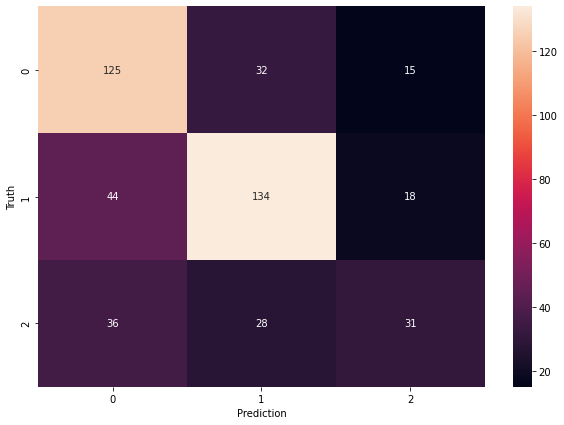

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

Key Takeaways
KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very high dimensional vector space, performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.

We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.